In [1]:
# importing all the libraries that required for this work.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load and read the data file.
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# checking the first five samples of data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# checking the total sample and total number of features.
df.shape

(5110, 12)

In [5]:
# display the information of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# checking for any missing value
print('Checking for any missing value:')
df.isnull().sum()

Checking for any missing value:


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# display the descriptions of the data frame
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# check if there are any repeat sample.
print('Check for duplcated samples:')
df.duplicated().sum()

Check for duplcated samples:


0

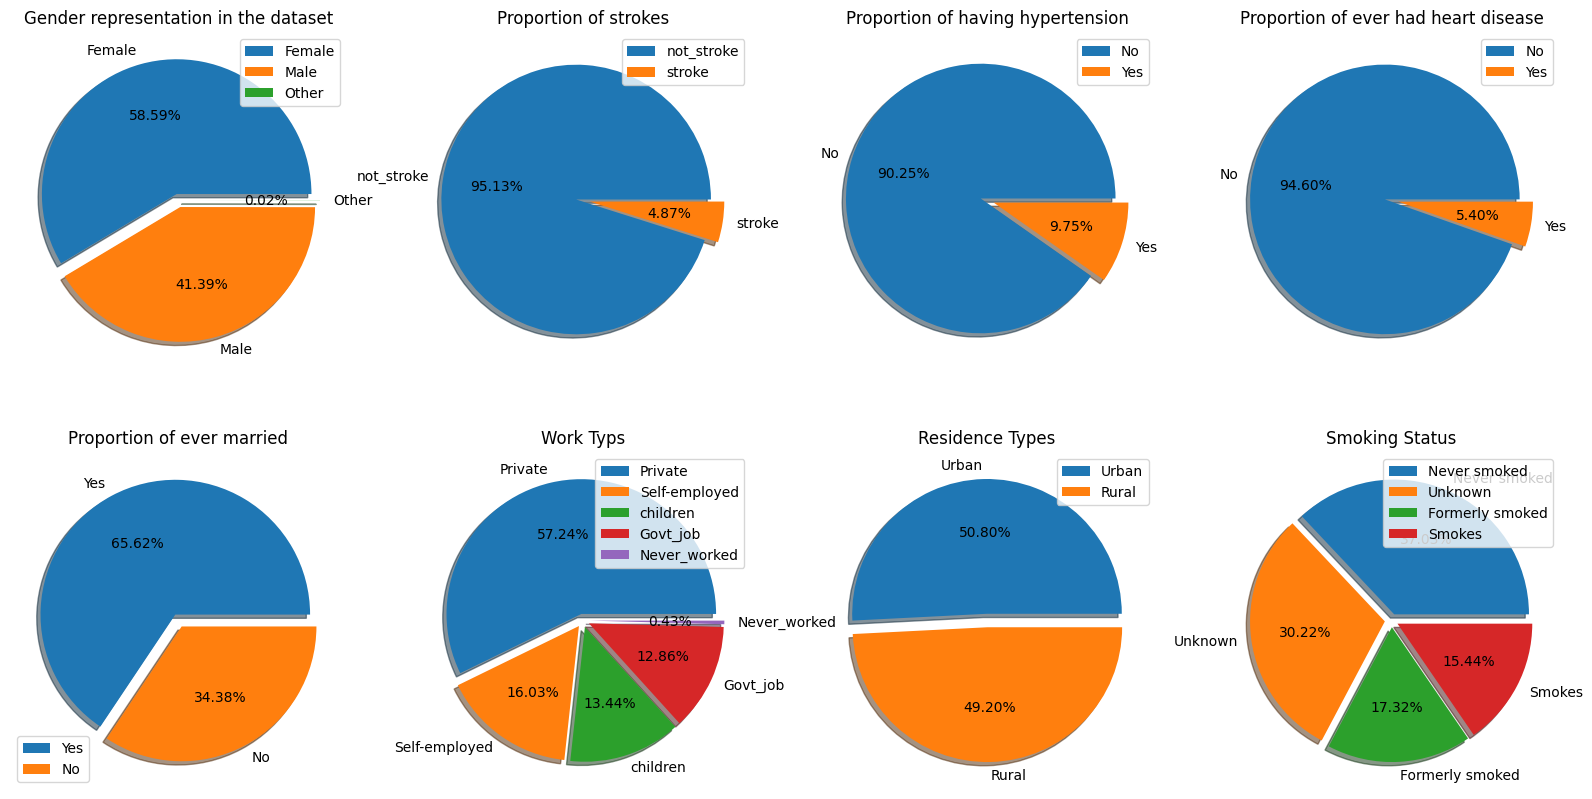

In [9]:
# Code inspired by https://stackoverflow.com/questions/65746665/plotting-multiple-pie-charts-in-a-single-figure
# Pei charts that display the distribution of each features
fig, aexs  = plt.subplots(2,4, figsize=(20,10))

gender_labels = ['Female', 'Male','Other']
gender_values = df['gender'].value_counts()
aexs[0, 0].pie(gender_values, labels=gender_labels,  autopct='%1.2f%%',shadow=True,explode=(0.05,0.05,0.05))
aexs[0, 0].set_title('Gender representation in the dataset')
aexs[0, 0].legend()

stroke_labels = ['not_stroke','stroke']
stroke_values = df['stroke'].value_counts()
aexs[0, 1].pie(stroke_values, labels=stroke_labels, autopct='%1.2f%%',shadow=True,explode=(0.05,0.05))
aexs[0, 1].set_title('Proportion of strokes')
aexs[0, 1].legend()

hypertension_labels = ['No', 'Yes']
hypertension_values = df['hypertension'].value_counts()
aexs[0, 2].pie(hypertension_values, labels=hypertension_labels, autopct='%1.2f%%',shadow=True,explode=(0.05,0.05))
aexs[0, 2].set_title('Proportion of having hypertension')
aexs[0, 2].legend()

heart_disease_labels = ['No', 'Yes']
heart_disease_values = df['heart_disease'].value_counts()
aexs[0, 3].pie(heart_disease_values, labels=heart_disease_labels, autopct='%1.2f%%',shadow=True,explode=(0.05,0.05))
aexs[0, 3].set_title('Proportion of ever had heart disease')
aexs[0, 3].legend()

ever_married_labels = ['Yes', 'No']
ever_married_values = df['ever_married'].value_counts()
aexs[1, 0].pie(ever_married_values, labels=ever_married_labels, autopct='%1.2f%%',shadow=True,explode=(0.05,0.05))
aexs[1, 0].set_title('Proportion of ever married')
aexs[1, 0].legend()

work_type_labels = ['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked',]
work_type_values = df['work_type'].value_counts()
aexs[1, 1].pie(work_type_values, labels=work_type_labels, autopct='%1.2f%%',shadow=True,explode=(0.05,0.05,0.05,0.05,0.05))
aexs[1, 1].set_title('Work Typs')
aexs[1, 1].legend()

Residence_type_labels = ['Urban', 'Rural']
Residence_type_values = df['Residence_type'].value_counts()
aexs[1, 2].pie(Residence_type_values, labels=Residence_type_labels, autopct='%1.2f%%',shadow=True,explode=(0.05,0.05))
aexs[1, 2].set_title('Residence Types')
aexs[1, 2].legend()

smoking_status_labels = ['Never smoked ', 'Unknown','Formerly smoked','Smokes']
smoking_status_values = df['smoking_status'].value_counts()
aexs[1, 3].pie(smoking_status_values, labels=smoking_status_labels, autopct='%1.2f%%',shadow=True,explode=(0.05,0.05,0.05,0.05))
aexs[1, 3].set_title('Smoking Status')
aexs[1, 3].legend()

<AxesSubplot: xlabel='bmi', ylabel='Count'>

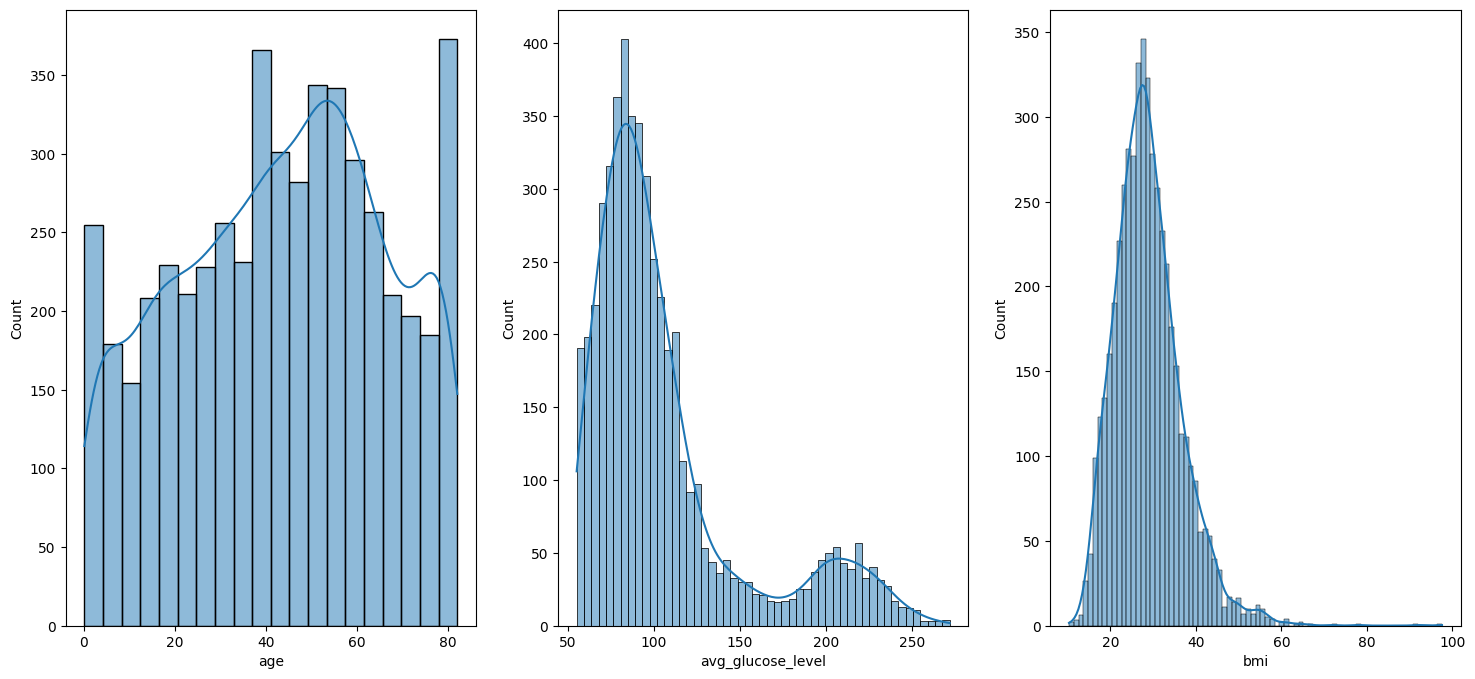

In [10]:
# histograms shows the distribution of age, glucose level and bmi
fig, aexs  = plt.subplots(1,3,figsize=(18,8))
sns.histplot(df['age'], ax=aexs[0], kde=True) # creating a histograms to show the distribution of age.
sns.histplot(df['avg_glucose_level'], ax=aexs[1], kde=True) # creating a histograms to show the distribution of average glucose level.
sns.histplot(df['bmi'], ax=aexs[2], kde=True) # creating a histograms to show the distribution of bmi.

In [11]:
'''
# create histograms that dispalys the influence of each features on stroke.
fig, aexs = plt.subplots(2,4, figsize=(20, 10))
sns.countplot(data=df, x='gender', hue='stroke', ax=aexs[0, 0])
sns.countplot(data=df, x='hypertension', hue='stroke', ax=aexs[0, 1])
sns.countplot(data=df, x='heart_disease', hue='stroke', ax=aexs[0, 2])
sns.countplot(data=df, x='ever_married', hue='stroke', ax=aexs[0, 3])
sns.countplot(data=df, x='work_type', hue='stroke', ax=aexs[1, 0])
sns.countplot(data=df, x='Residence_type', hue='stroke', ax=aexs[1, 1])
sns.countplot(data=df, x='smoking_status', hue='stroke', ax=aexs[1, 2])
plt.delaxes()
'''

"\n# create histograms that dispalys the influence of each features on stroke.\nfig, aexs = plt.subplots(2,4, figsize=(20, 10))\nsns.countplot(data=df, x='gender', hue='stroke', ax=aexs[0, 0])\nsns.countplot(data=df, x='hypertension', hue='stroke', ax=aexs[0, 1])\nsns.countplot(data=df, x='heart_disease', hue='stroke', ax=aexs[0, 2])\nsns.countplot(data=df, x='ever_married', hue='stroke', ax=aexs[0, 3])\nsns.countplot(data=df, x='work_type', hue='stroke', ax=aexs[1, 0])\nsns.countplot(data=df, x='Residence_type', hue='stroke', ax=aexs[1, 1])\nsns.countplot(data=df, x='smoking_status', hue='stroke', ax=aexs[1, 2])\nplt.delaxes()\n"

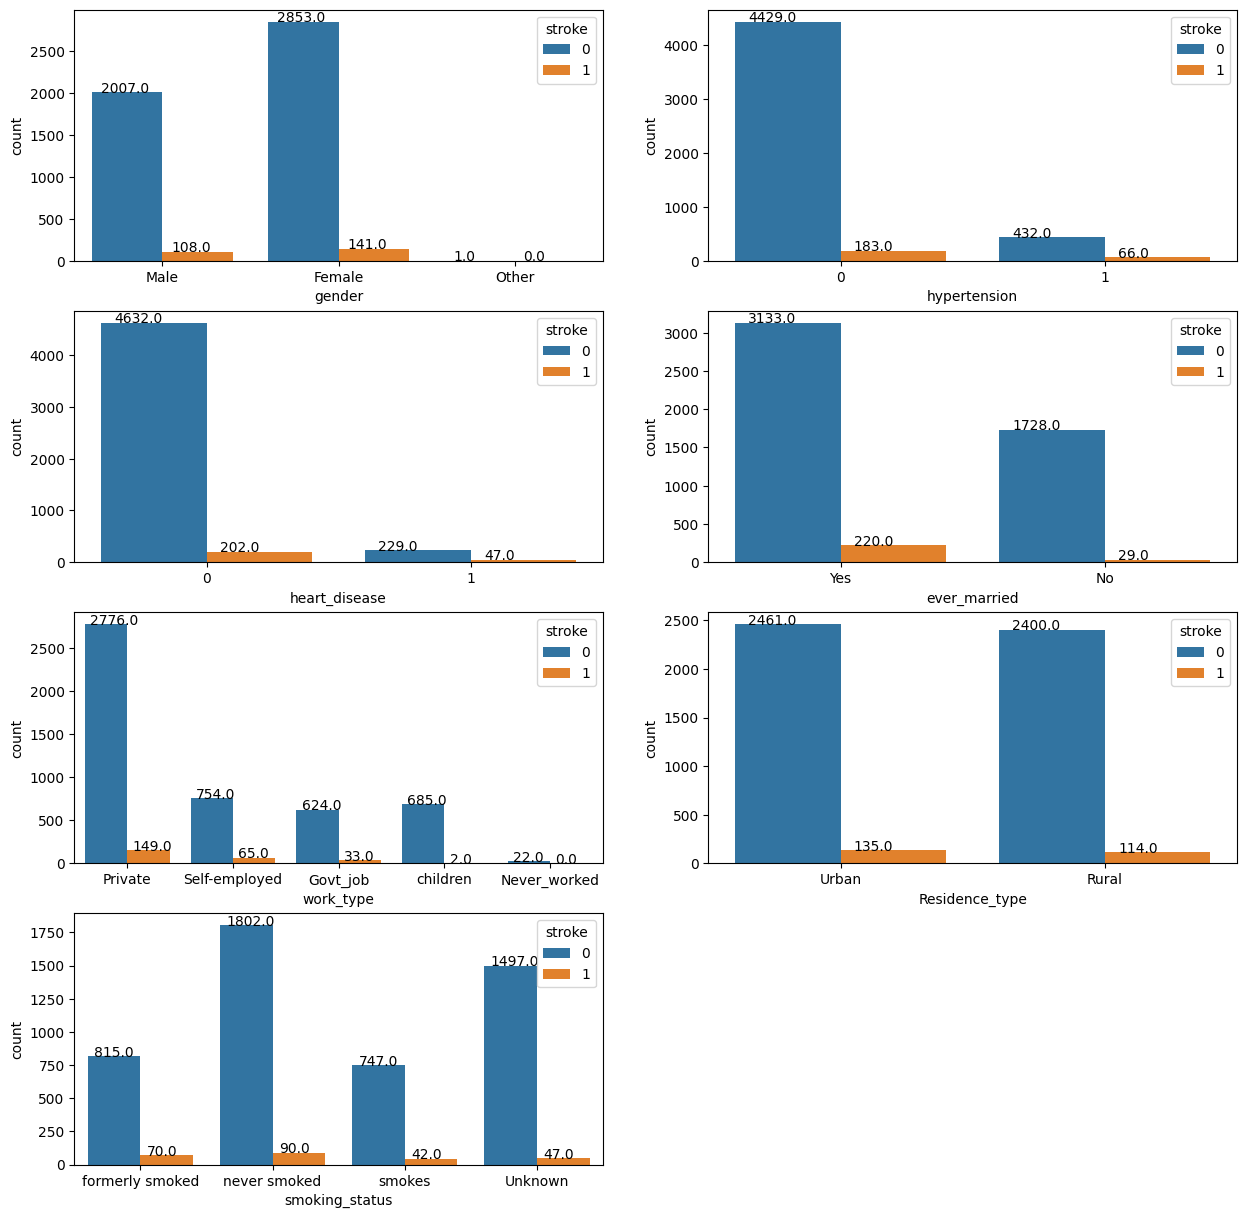

In [12]:
# the histograms that shows the influence of each features on risk of stroke.
fig, aexs = plt.subplots(4,2, figsize=(15, 15))
features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
n=0
for row in range(4):
    for column in range(2):
        ax = sns.countplot(data=df, x=features[n], hue='stroke', ax=aexs[row, column])
        for p in ax.patches: # code from https://www.tutorialspoint.com/matplotlib-how-to-show-the-count-values-on-the-top-of-a-bar-in-a-countplot
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+0.1))
        n+=1
        if n == len(features):
            break
plt.delaxes() #delete the last empty chart

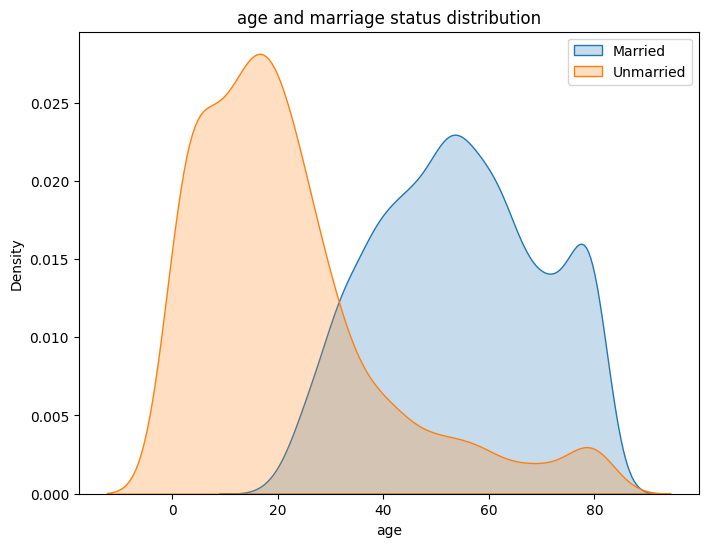

In [13]:
# KDE graph shows the distribution age/marriage status.
plt.figure(figsize=(8,6))
sns.kdeplot(df[df['ever_married'] == 'Yes']["age"], label='Married', shade=True ) # people are married 
sns.kdeplot(df[df['ever_married'] == 'No']["age"], label='Unmarried', shade=True) # people are unmarried
plt.title('age and marriage status distribution')
plt.legend()

In [14]:
'''
# create violin chart to show the influence of age, glucose level and bmi on stroke
fig, aexs = plt.subplots(1,3, figsize=(15,5))
sns.violinplot(data=df, x='stroke', y='age', hue='stroke', ax=aexs[0])
sns.violinplot(data=df, x='stroke', y='avg_glucose_level', hue='stroke', ax=aexs[1])
sns.violinplot(data=df, x='stroke', y='bmi', hue='stroke', ax=aexs[2])
'''

"\n# create violin chart to show the influence of age, glucose level and bmi on stroke\nfig, aexs = plt.subplots(1,3, figsize=(15,5))\nsns.violinplot(data=df, x='stroke', y='age', hue='stroke', ax=aexs[0])\nsns.violinplot(data=df, x='stroke', y='avg_glucose_level', hue='stroke', ax=aexs[1])\nsns.violinplot(data=df, x='stroke', y='bmi', hue='stroke', ax=aexs[2])\n"

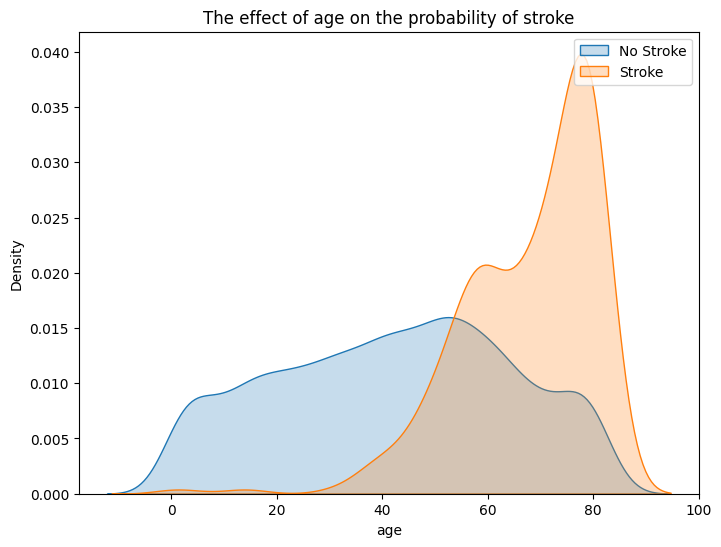

In [15]:
# KDE graph shows the influence of age on risk of stroke
plt.figure(figsize=(8,6))
sns.kdeplot(df[df['stroke'] == 0]["age"], label='No Stroke', shade=True ) #people with no stroke
sns.kdeplot(df[df['stroke'] == 1]["age"], label='Stroke', shade=True) #people with stroke
plt.title('The effect of age on the probability of stroke')
plt.legend()

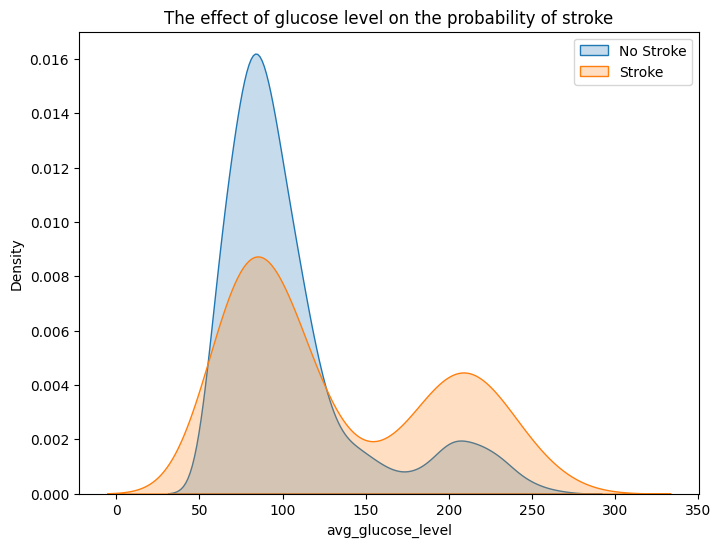

In [16]:
#KED graph shows the influence of glucose level on stroke
plt.figure(figsize=(8,6))
sns.kdeplot(df[df['stroke'] == 0]["avg_glucose_level"], label='No Stroke', shade=True) #people with no stroke
sns.kdeplot(df[df['stroke'] == 1]["avg_glucose_level"], label='Stroke', shade=True) #people with stroke
plt.title('The effect of glucose level on the probability of stroke')
plt.legend()


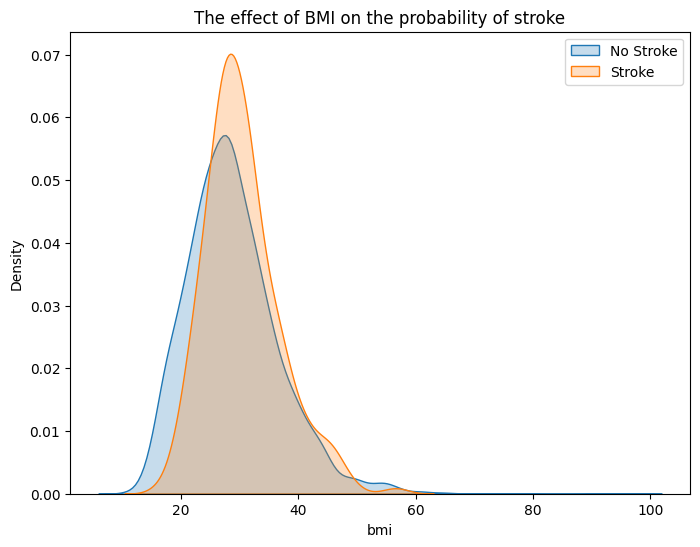

In [17]:
# KED graph shows the influence of BMI on stroke
plt.figure(figsize=(8,6))
sns.kdeplot(df[df['stroke'] == 0]["bmi"], label='No Stroke', shade=True) #people with no stroke
sns.kdeplot(df[df['stroke'] == 1]["bmi"], label='Stroke', shade=True) #people with stroke
plt.title('The effect of BMI on the probability of stroke')
plt.legend()

<AxesSubplot: >

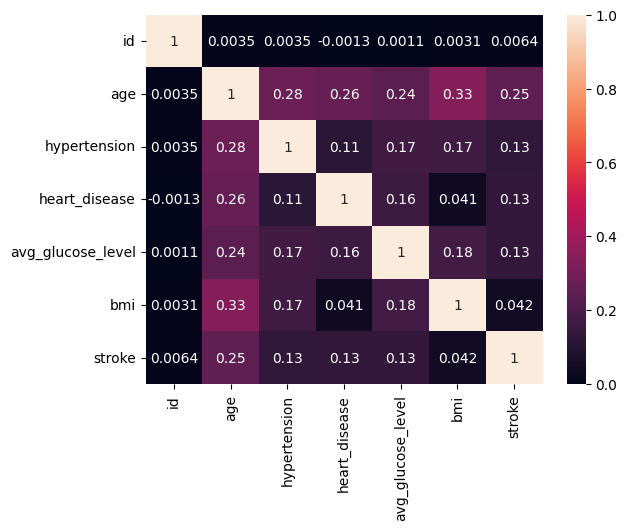

In [18]:
# create a heat map to show to correlation between features.
correlation = df.corr()
sns.heatmap(correlation, annot=True)

In [19]:
# show the correlation between feature and stroke.
print('Displaying the correlation between features and stroke')
correlation['stroke']

Displaying the correlation between features and stroke


id                   0.006388
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.042374
stroke               1.000000
Name: stroke, dtype: float64

In [20]:
# code help from https://discourse.jupyter.org/t/del-drop-column-axis-in-data-frames-python-jupyter-notebook/1791
df = df.drop(columns='id', axis=1) #drop the id column, as id would't effect the results.
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [21]:
# checking for any missing values
print('Check for any missing values:')
df.isnull().sum()

Check for any missing values:


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [22]:
# replace the missing values with mean bmi value which is 28.89
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
# check if there all values after correction.
print('Check for any missing values:')
df.isnull().sum()

Check for any missing values:


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
# encoding
print('Before Encoding:')
df.head()

Before Encoding:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [24]:
# code inspired by https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# Encode using label encoding method.
cat_features = ['gender', 'ever_married','work_type','Residence_type','smoking_status'] #list all Categorical Features
encoder=LabelEncoder()
for label in cat_features:
    df[label] = encoder.fit_transform(df[label])

print('After Encoding:')
df.head()


After Encoding:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [25]:
X = df.drop(columns='stroke', axis=1) # set up the features
y  = df['stroke'] # set up the answers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #split the dataset into train data and test data

# Before scale and balance the data, test the model performance.
print('Modelling with Logistic Regression method:')
lgr_model = LogisticRegression(random_state=0)
lgr_model.fit(X_train, y_train) #training the model.
lgr_train_score = lgr_model.score(X_train, y_train) #get training score
lgr_test_score = lgr_model.score(X_test, y_test) #get test score
print('The training score of LogisticRegression: {:.2f}'.format(lgr_train_score))
print('The test score of LogisticRegression: {:.2f}'.format(lgr_test_score))

Modeling with Logistic Regression method:
The training score of LogisticRegression: 0.95
The test score of LogisticRegression: 0.95


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1457
           1       0.33      0.01      0.03        76

    accuracy                           0.95      1533
   macro avg       0.64      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



<AxesSubplot: >

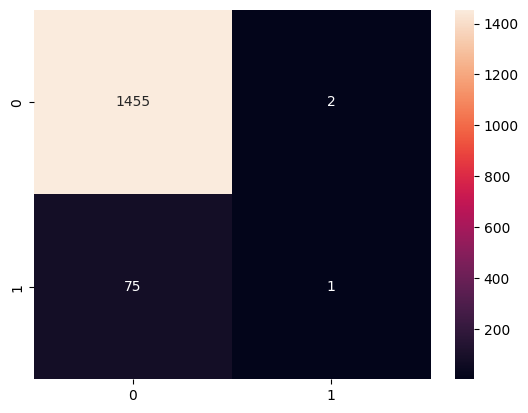

In [26]:
# display the model performance report
y_prediction = lgr_model.predict(X_test)
print(classification_report(y_test, y_prediction))

# display the confusion matrix
matrix = confusion_matrix(y_test, y_prediction) #create a confusion matrix
sns.heatmap(matrix, annot=True, fmt='d') #create a heatmap of the matrix

In [27]:
print('Data before Scaling:')
df.head()

Data before Scaling:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [28]:
# code inspired byhttps://medium.datadriveninvestor.com/methods-and-uses-of-feature-scaling-94a44b43181a
# scaling the numerical features using Min-Max scaling, also known as normalization.
scaler = MinMaxScaler()
num_features = ['age', 'avg_glucose_level', 'bmi']
df[num_features] = scaler.fit_transform(df[num_features]) #applying scaling method
print('Data after scaling:')
df.head()

Data after scaling:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.301260,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.212981,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.254296,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.276060,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.156930,2,1


In [29]:
# Code help from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
# balancing by using SMOTE
smote=SMOTE()
X_original = df.drop(columns='stroke', axis=1)
y_original  = df['stroke']
X_oversample, y_oversample = smote.fit_resample(X_original, y_original)

print('People with stroke before balancing: {}'.format(sum(y_original==1)))
print('People with no stroke before balancing: {}\n'.format(sum(y_original==0)))
print('People with stroke after balancing: {}'.format(sum(y_oversample==1)))
print('People with no stroke after balancing: {}'.format(sum(y_oversample==0)))

People with stroke before balancing: 249
People with no stroke before balancing: 4861

People with stroke after balancing: 4861
People with no stroke after balancing: 4861


In [30]:
# split dataset into training dataset and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.3, random_state=0)
print('The shape of training dataset: {}'.format(X_train.shape))
print('The shape of testing dataset: {}'.format(X_test.shape))

The shape of training dataset: (6805, 10)
The shape of testing dataset: (2917, 10)


In [31]:
# Logistic Regression algorithm and model.
print('Score for Logistic Regression Model:')
lgr_model = LogisticRegression(random_state=0) #apply the algorithm
lgr_model.fit(X_train, y_train) #training the model.
lgr_train_score = lgr_model.score(X_train, y_train) #get training score
lgr_test_score = lgr_model.score(X_test, y_test) #get test score
print('The training score of LogisticRegression: {:.2f}'.format(lgr_train_score))
print('The test score of LogisticRegression: {:.2f}'.format(lgr_test_score))


Score for Logistic Regression Model:
The training score of LogisticRegression: 0.78
The test score of LogisticRegression: 0.79


              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1450
           1       0.77      0.84      0.80      1467

    accuracy                           0.79      2917
   macro avg       0.79      0.79      0.79      2917
weighted avg       0.79      0.79      0.79      2917



<AxesSubplot: >

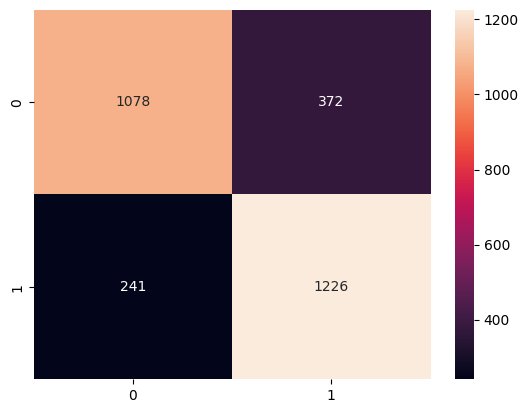

In [32]:
# code help from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# display the model performance report
y_prediction = lgr_model.predict(X_test)
print(classification_report(y_test, y_prediction))

# code help from https://indianaiproduction.com/seaborn-heatmap
# display the confusion matrix
matrix = confusion_matrix(y_test, y_prediction) #create a confusion matrix
sns.heatmap(matrix, annot=True, fmt='d') #create a heatmap of the matrix

In [33]:
# Help from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# Support Vector Classification algorithm and model.
print('Score for Support Vector Classification Model:')
svc_model = SVC(random_state=0) #apply the algorithm
svc_model.fit(X_train, y_train) #training the model

svc_train_score = svc_model.score(X_train, y_train) #get training score
svc_test_score = svc_model.score(X_test, y_test) #get test score
print('The training score of SVC: {:.2f}'.format(svc_train_score))
print('The test score of SVC: {:.2f}'.format(svc_test_score))


Score for Support Vector Classification Model:
The training score of SVC: 0.81
The test score of SVC: 0.81


              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1450
           1       0.77      0.88      0.83      1467

    accuracy                           0.81      2917
   macro avg       0.82      0.81      0.81      2917
weighted avg       0.82      0.81      0.81      2917



<AxesSubplot: >

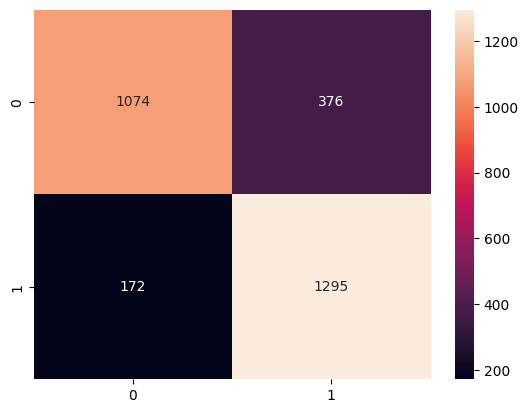

In [34]:
# display the model performance report
y_prediction = svc_model.predict(X_test)
print(classification_report(y_test, y_prediction))
# display the confusion matrix
matrix = confusion_matrix(y_test, y_prediction) #create a confusion matrix
sns.heatmap(matrix, annot=True, fmt='d') #create a heatmap of the matrix

In [35]:
#Help from https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
# K-Nearest Neighbors algorithm and Model
print('Score for K-Nearest Neighbors Model:')
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train) #training the model

knn_train_score = knn_model.score(X_train, y_train) #get training score
knn_test_score = knn_model.score(X_test, y_test) #get test score
print('The training score of KNN: {:.2f}'.format(knn_train_score))
print('The test score of KNN: {:.2f}'.format(knn_test_score))


Score for K-Nearest Neighbors Model:
The training score of KNN: 0.93
The test score of KNN: 0.88


              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1450
           1       0.83      0.97      0.89      1467

    accuracy                           0.88      2917
   macro avg       0.89      0.88      0.88      2917
weighted avg       0.89      0.88      0.88      2917



<AxesSubplot: >

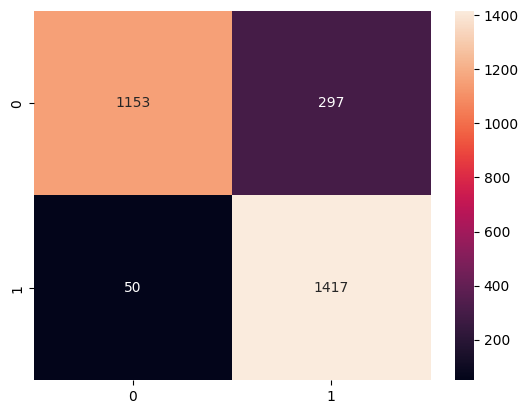

In [36]:
# display the model performance report
y_prediction = knn_model.predict(X_test)
print(classification_report(y_test, y_prediction))
# display the confusion matrix
matrix = confusion_matrix(y_test, y_prediction) #create a confusion matrix
sns.heatmap(matrix, annot=True, fmt='d') #create a heatmap of the matrix

In [37]:
#Help from https://www.dominodatalab.com/data-science-dictionary/model-tuning and https://www.kaggle.com/code/enespolat/grid-search-with-logistic-regression
print('Finding the best parameters for Logistic Regression Model using GridSearchCV, to improve the accuracy')
parameters = [{'penalty':['l1','l2'], 'C':[0.1, 1, 10, 100, 1000]}] #set up range of parameters
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, scoring='accuracy', cv=10, verbose=0) #set up the model

grid_search.fit(X_train, y_train) # training the model
print('The Best parameters: {:}'.format(grid_search.best_params_))
print('The Best score: {:.2f}'.format(grid_search.best_score_))

print('The test score with best parameter:')
final_Lgr_model = LogisticRegression(random_state=0, C=1, penalty='l2') #model with best parameter
final_Lgr_model.fit(X_train, y_train)
test_score = final_Lgr_model.score(X_test, y_test)
print('The old test score : {:.2f}'.format(lgr_test_score))
print('The final test score: {:.2f}'.format(test_score))

Finding the best parameters for Logistic Regression Model using GridSearchCV, to improve the accuracy
The Best parameters: {'C': 1, 'penalty': 'l2'}
The Best score: 0.78
The test score with best parameter:
The old test score : 0.79
The final test score: 0.79


Logistic Regression Model Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1450
           1       0.77      0.84      0.80      1467

    accuracy                           0.79      2917
   macro avg       0.79      0.79      0.79      2917
weighted avg       0.79      0.79      0.79      2917

Confusion Matrix of Logistic Regression Model:


<AxesSubplot: >

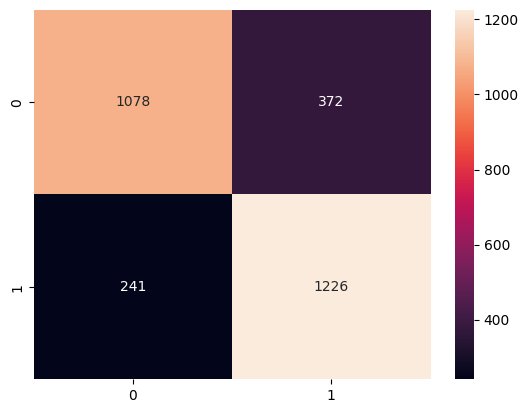

In [38]:
# display the model performance report
y_prediction = final_Lgr_model.predict(X_test)
print('Logistic Regression Model Report:')
print(classification_report(y_test, y_prediction))
# display the confusion matrix
matrix = confusion_matrix(y_test, y_prediction) #create a confusion matrix
print('Confusion Matrix of Logistic Regression Model:')
sns.heatmap(matrix, annot=True, fmt='d') #create a heatmap of the matrix

In [45]:
#Help from https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
print('Finding the best parameters for SVC using GridSearchCV, to improve the accuracy')
parameters = {'C':[1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10], 'kernel':['rbf']} #set up range of parameters
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', cv=5, verbose=0) #set up the model

grid_search.fit(X_train, y_train) # training the model
print('The Best parameters: {:}'.format(grid_search.best_params_))
print('The Best score: {:.2f}'.format(grid_search.best_score_))

print('The test score with best parameter:')
final_SVC_model = SVC(random_state=0, C=100, gamma=10, kernel='rbf') #model with best parameter
final_SVC_model.fit(X_train, y_train)
test_score = final_SVC_model.score(X_test, y_test)
print('The old test score: {:.2f}'.format(knn_test_score))
print('The final test score: {:.2f}'.format(test_score))


Finding the best parameters for SVC using GridSearchCV, to improve the accuracy
The Best parameters: {'C': 1000, 'gamma': 10, 'kernel': 'rbf'}
The Best score: 0.90
The test score with best parameter:
The old test score: 0.88
The final test score: 0.91


SVC Model Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1450
           1       0.88      0.96      0.92      1467

    accuracy                           0.91      2917
   macro avg       0.92      0.91      0.91      2917
weighted avg       0.92      0.91      0.91      2917

Confusion Matrix of SVC Model:


<AxesSubplot: >

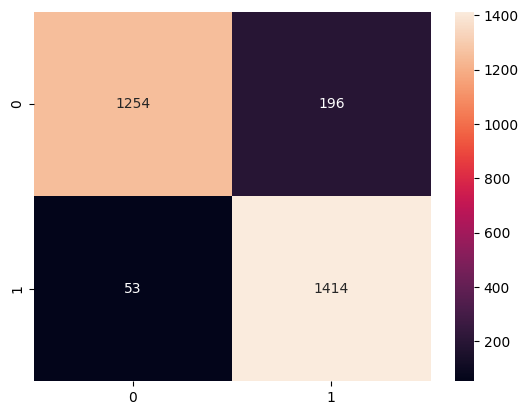

In [40]:
# display the model performance report
y_prediction = final_SVC_model.predict(X_test)
print('SVC Model Report:')
print(classification_report(y_test, y_prediction))
# display the confusion matrix
matrix = confusion_matrix(y_test, y_prediction) #create a confusion matrix
print('Confusion Matrix of SVC Model:')
sns.heatmap(matrix, annot=True, fmt='d') #create a heatmap of the matrix

In [41]:
#Help from https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
print('Finding the best paraments for KNN using GridSearchCV, to improve the accuracy')
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform', 'distance']} #set up range of parameters
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters, scoring='accuracy', cv=5, verbose=0) #set up the model

grid_search.fit(X_train, y_train) # training the model
print('The Best parameters: {:}'.format(grid_search.best_params_))
print('The Best score: {:.2f}'.format(grid_search.best_score_))

print('The test score with best parameter:')
final_KNN_model = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='kd_tree') #model with best parameter
final_KNN_model.fit(X_train, y_train)
test_score = final_KNN_model.score(X_test, y_test)
print('the Old test score: {:.2f}'.format(knn_test_score))
print('The final test score: {:.2f}'.format(test_score))

Finding the best paraments for KNN using GridSearchCV, to improve the accuracy
The Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
The Best score: 0.89
The test score with best parameter:
the Old test score: 0.88
The final test score: 0.90


KNN Model Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1450
           1       0.87      0.96      0.91      1467

    accuracy                           0.90      2917
   macro avg       0.91      0.90      0.90      2917
weighted avg       0.91      0.90      0.90      2917

Confusion Matrix of KNN:


<AxesSubplot: >

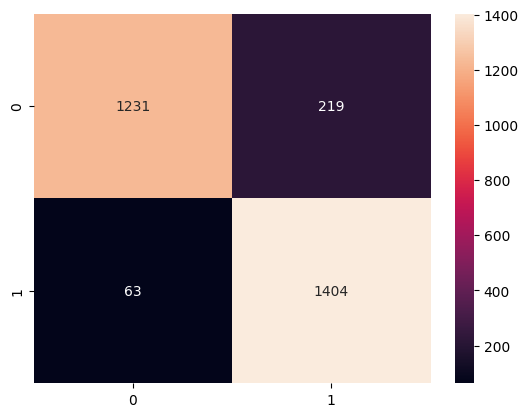

In [42]:
# display the model performance report
y_prediction = final_KNN_model.predict(X_test)
print('KNN Model Report:')
print(classification_report(y_test, y_prediction))
# display the confusion matrix
matrix = confusion_matrix(y_test, y_prediction) #create a confusion matrix
print('Confusion Matrix of KNN:')
sns.heatmap(matrix, annot=True, fmt='d') #create a heatmap of the matrix

In [43]:
'''
print('Logistic Regression Model Report:')
print(classification_report(y_test, final_Lgr_model.predict(X_test)))

print('KNN Model Report:')
print(classification_report(y_test, final_KNN_model.predict(X_test)))

print('SVC Model Report:')
print(classification_report(y_test, final_SVC_model.predict(X_test)))
'''

"\nprint('Logistic Regression Model Report:')\nprint(classification_report(y_test, final_Lgr_model.predict(X_test)))\n\nprint('KNN Model Report:')\nprint(classification_report(y_test, final_KNN_model.predict(X_test)))\n\nprint('SVC Model Report:')\nprint(classification_report(y_test, final_SVC_model.predict(X_test)))\n"